In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from keras import regularizers
from keras import backend as K
import tensorflow as tf

# define the number of input neurons and hidden neurons
n_input = 784  # input layer size
n_hidden = 256  # hidden layer size

**Model architecture:**

Here we are using autoencoder with single layer. input_img is defined as the input layer of the autoencoder with the shape of (n_input,). hidden_layer is defined as the only hidden layer of the autoencoder with a size of n_hidden. The activation function used for both the hidden layer and the output layer is sigmoid. The Dense layers define a fully connected neural network layer, and the Model function combines the encoder and decoder into an autoencoder.

In [ ]:
# define the input layer
input_img = Input(shape=(n_input,))

# define the encoder layers
hidden_layer = Dense(n_hidden, activation='sigmoid',name='hidden_layer')(input_img)
output_layer = Dense(n_input, activation='sigmoid')(hidden_layer)
# Combine the encoder and decoder into an autoencoder
autoencoder = Model(inputs=input_img, outputs=output_layer)

**Loss function:**

The autoencoder is then compiled using the sparse_loss function, which defines a custom loss function that combines a reconstruction loss (the difference between the input and reconstructed images) and a sparsity loss (the difference between the desired sparsity level and the actual sparsity of the hidden neurons). The sparsity loss is computed using the kl_divergence function, which computes the Kullback-Leibler divergence between the desired sparsity level and the actual sparsity of the hidden neurons.

In [ ]:
# define the sparsity constraint
def kl_divergence(p, p_hat):
    return p * K.log(p / p_hat) + (1 - p) * K.log((1 - p) / (1 - p_hat))

def sparse_constraint(hidden_layer):
    p_hat = K.mean(hidden_layer, axis=1)
    return beta * K.sum(kl_divergence(sparsity, p_hat))

In [ ]:
# Compile the autoencoder with the sparsity loss
autoencoder.add_loss(sparse_constraint(hidden_layer))
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# load and preprocess the data
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 5s 19ms/step - loss: 17.2313 - val_loss: 2.6776
Epoch 2/50
235/235 [==============================] - 6s 25ms/step - loss: 1.4970 - val_loss: 0.7811
Epoch 3/50
235/235 [==============================] - 5s 20ms/step - loss: 0.5805 - val_loss: 0.4172
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.3443 - val_loss: 0.2844
Epoch 5/50
235/235 [==============================] - 6s 24ms/step - loss: 0.2452 - val_loss: 0.2178
Epoch 6/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1925 - val_loss: 0.1794
Epoch 7/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1609 - val_loss: 0.1547
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1399 - val_loss: 0.1375
Epoch 9/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1249 - val_loss: 0.1239
Epoch 10/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1125 - val_l

313/313 [==============================] - 1s 3ms/step


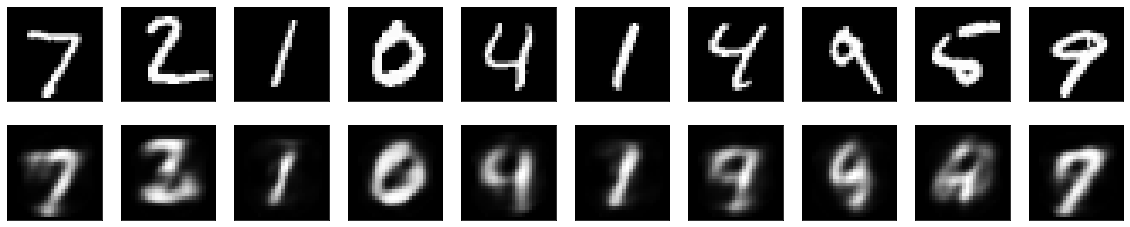

In [ ]:
import matplotlib.pyplot as plt

# Get the reconstructed output from the autoencoder
X_test=x_test
reconstructed_val = autoencoder.predict(X_test)

# Display the input and output images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

**Visualising the reduced dimensions:**

To visualize the reduced dimension values, you can extract the encoder model from the autoencoder and use it to transform the input data into the reduced dimension representation. You can then plot the reduced dimension values against each other to see if any patterns or clusters emerge.

In this code, we extract the encoder model from the autoencoder using the Model function and specifying the input and output layers. We then use the encoder to transform the input data X_test into the reduced dimension representation X_encoded. Finally, we plot the reduced dimension values against each other using matplotlib, where X_encoded[:,0] and X_encoded[:,1] represent the first and second dimensions of the reduced representation, and y_test is the true label for each input data point. The cmap='jet' argument specifies the color map for the plot, and plt.colorbar(scatter) adds a color bar indicating the label values.

In [ ]:
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt

# Extract the encoder model from the autoencoder
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('hidden_layer').output)

# Transform the input data into the reduced dimension representation
X_encoded = encoder.predict(X_test)

np.shape(X_encoded)

313/313 [==============================] - 1s 3ms/step


(10000, 256)